In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import os;
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img

In [ ]:
len(os.listdir("/content/drive/MyDrive/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=(preprocess_input))
val_datagen = ImageDataGenerator(preprocessing_function=(preprocess_input))

In [ ]:
# Preprocessing our images
train = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size=(256,256), batch_size=32)
val = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(256,256), batch_size=32)

Found 70575 images belonging to 38 classes.
Found 17611 images belonging to 38 classes.


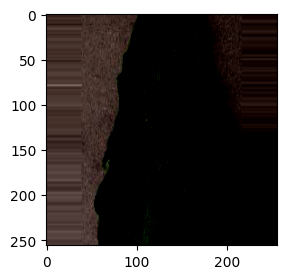

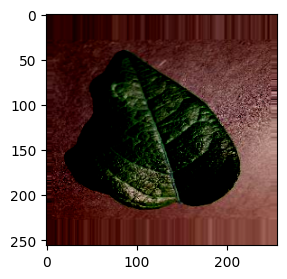

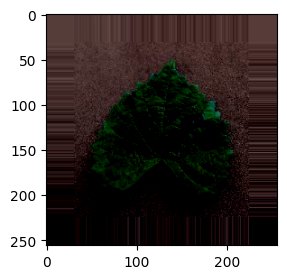

In [ ]:
# Ploting the preprocessed image
t_img,label = train.next()
def fun(img_arr , label):
  for i,l in zip(img_arr,label):
    plt.figure(figsize=(3,3))
    plt.imshow(i/180)
    plt.show()
fun(t_img[:3],label[:3])

In [ ]:
# Creating the modedl step-1
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
import keras;

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for lay in base_model.layers:
  lay.trainable = False;
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units=38,activation="softmax")(x)

# Model Creation final

model = Model(base_model.input,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer = "adam", loss = keras.losses.categorical_crossentropy , metrics = ["accuracy"])
# Avoiding early stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
es = EarlyStopping(monitor = "val_accuracy", min_delta=0.01, patience=3, verbose = 1)

In [ ]:
# model check point
mc = ModelCheckpoint(filepath="best_model.h5" ,min_delta=0.01, patience=3, verbose = 1,save_best_only=True )

In [ ]:
cb = [es,mc]

In [ ]:
his = model.fit_generator(train, steps_per_epoch=9, epochs=50,verbose=1,callbacks=cb , validation_data=val,validation_steps=9)

<ipython-input-26-a8604d618bbf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch=9, epochs=50,verbose=1,callbacks=cb , validation_data=val,validation_steps=9)


Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 15.2514 - accuracy: 0.3472
Epoch 1: val_loss improved from inf to 12.68766, saving model to best_model.h5
9/9 [==============================] - 204s 24s/step - loss: 15.2514 - accuracy: 0.3472 - val_loss: 12.6877 - val_accuracy: 0.5039


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 13.7762 - accuracy: 0.4722
Epoch 2: val_loss improved from 12.68766 to 8.19314, saving model to best_model.h5
9/9 [==============================] - 200s 24s/step - loss: 13.7762 - accuracy: 0.4722 - val_loss: 8.1931 - val_accuracy: 0.5977
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 12.1525 - accuracy: 0.5035
Epoch 3: val_loss did not improve from 8.19314
9/9 [==============================] - 190s 23s/step - loss: 12.1525 - accuracy: 0.5035 - val_loss: 9.7587 - val_accuracy: 0.6094
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 9.0864 - accuracy: 0.5903
Epoch 4: val_loss did not improve from 8.19314
9/9 [==============================] - 188s 22s/step - loss: 9.0864 - accuracy: 0.5903 - val_loss: 9.0098 - val_accuracy: 0.6602
Epoch 5/50
9/9 [==============================] - ETA: 0s - loss: 10.2042 - accuracy: 0.6215
Epoch 5: val_loss did not improve from 8.19314
9/9 [===========

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy vs Valid_Accuracy')

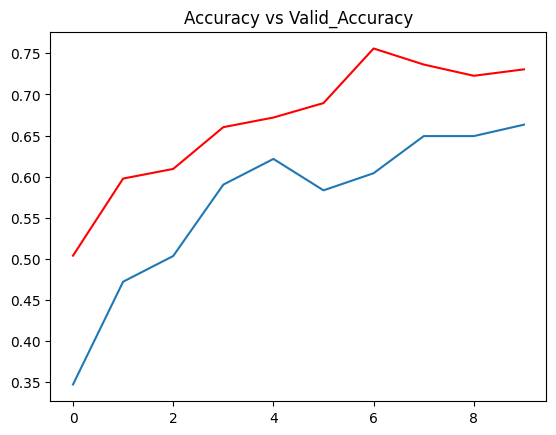

In [ ]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"], c = "red")
plt.title("Accuracy vs Valid_Accuracy")

# Accuracy is increased

Text(0.5, 1.0, 'loss vs Valid_loss')

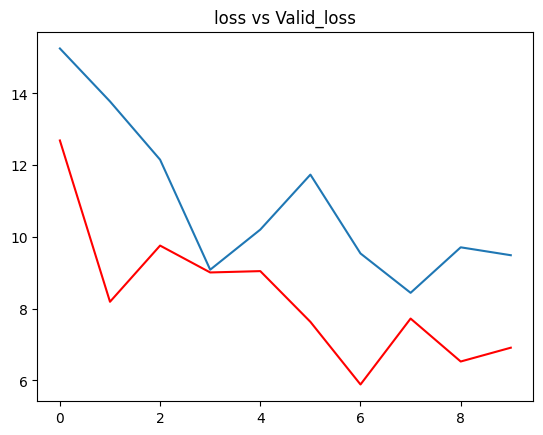

In [ ]:
plt.plot(h["loss"])
plt.plot(h["val_loss"], c = "red")
plt.title("loss vs Valid_loss")

# Loss is decreased

In [ ]:
# load best model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
# Give i/p here

path = "/content/drive/MyDrive/archive/test/test/TomatoHealthy3.JPG"
predict(path)

def predict(path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im , axis=0)
  pred = np.argmax(model.predict(img))
  print(f" The image belongs to {ref[pred]}")

1/1 [==============================] - 0s 35ms/step
 The image belongs to Tomato___healthy


Final model